In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [33]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\DIABETIC DATASET\cleandiabetic.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,4.546836,28.1,0.408656,2.140695,0
1,0,137,40,35,5.517848,43.1,1.512614,2.396782,1
2,3,78,50,32,4.447960,31.0,0.497996,2.258101,1
3,2,197,70,45,8.158305,30.5,0.397492,2.698168,1
4,1,189,60,23,9.457800,30.1,0.630872,2.771488,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    float64
 8   Outcome                   392 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 27.7 KB


In [35]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [37]:
#modelling
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(random_state=True)
dt_default.fit(X_train,y_train)
#prediction
ypred_train = dt_default.predict(X_train)
ybase_pred = dt_default.predict(X_test)
#evaluation
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(ypred_train,y_train))
print('test accuracy',accuracy_score(ybase_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(dt_default,X,y,cv=5).mean())

train accuracy 1.0
test accuracy 0.6835443037974683
cross validation score 0.7221356702369361


In [38]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,117,60,23,4.732623,33.8,0.682642,2.279507
258,0,180,90,26,4.481405,36.5,0.560357,2.432299
139,0,78,88,29,3.419952,36.9,0.658787,2.140695
310,1,181,78,42,6.641852,40.0,1.121606,2.165737
349,2,101,58,17,6.423158,24.2,0.783582,2.189939
...,...,...,...,...,...,...,...,...
203,3,96,56,34,4.862944,24.7,0.971597,2.498999
255,6,154,74,32,5.778997,29.3,0.915969,2.498999
72,9,156,86,28,5.371685,34.3,1.090413,2.545730
235,9,134,74,33,3.914868,25.9,0.678233,3.000000


In [39]:
X_train[X_train['Glucose']<=127.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,117,60,23,4.732623,33.8,0.682642,2.279507
139,0,78,88,29,3.419952,36.9,0.658787,2.140695
349,2,101,58,17,6.423158,24.2,0.783582,2.189939
95,4,109,64,44,4.626065,34.8,0.951315,2.258101
327,0,102,86,17,4.717694,29.3,0.833667,2.279507
...,...,...,...,...,...,...,...,...
276,8,100,74,40,5.990726,39.4,0.813019,2.560750
237,8,74,70,40,3.659306,35.3,0.839643,2.498999
129,2,100,70,52,3.848501,40.5,0.822800,2.236068
335,5,123,74,40,4.254321,34.1,0.518652,2.300327


In [40]:
y_train.value_counts()

Outcome
0    207
1    106
Name: count, dtype: int64

# Modelling
**Decision tree classifier**

In [41]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

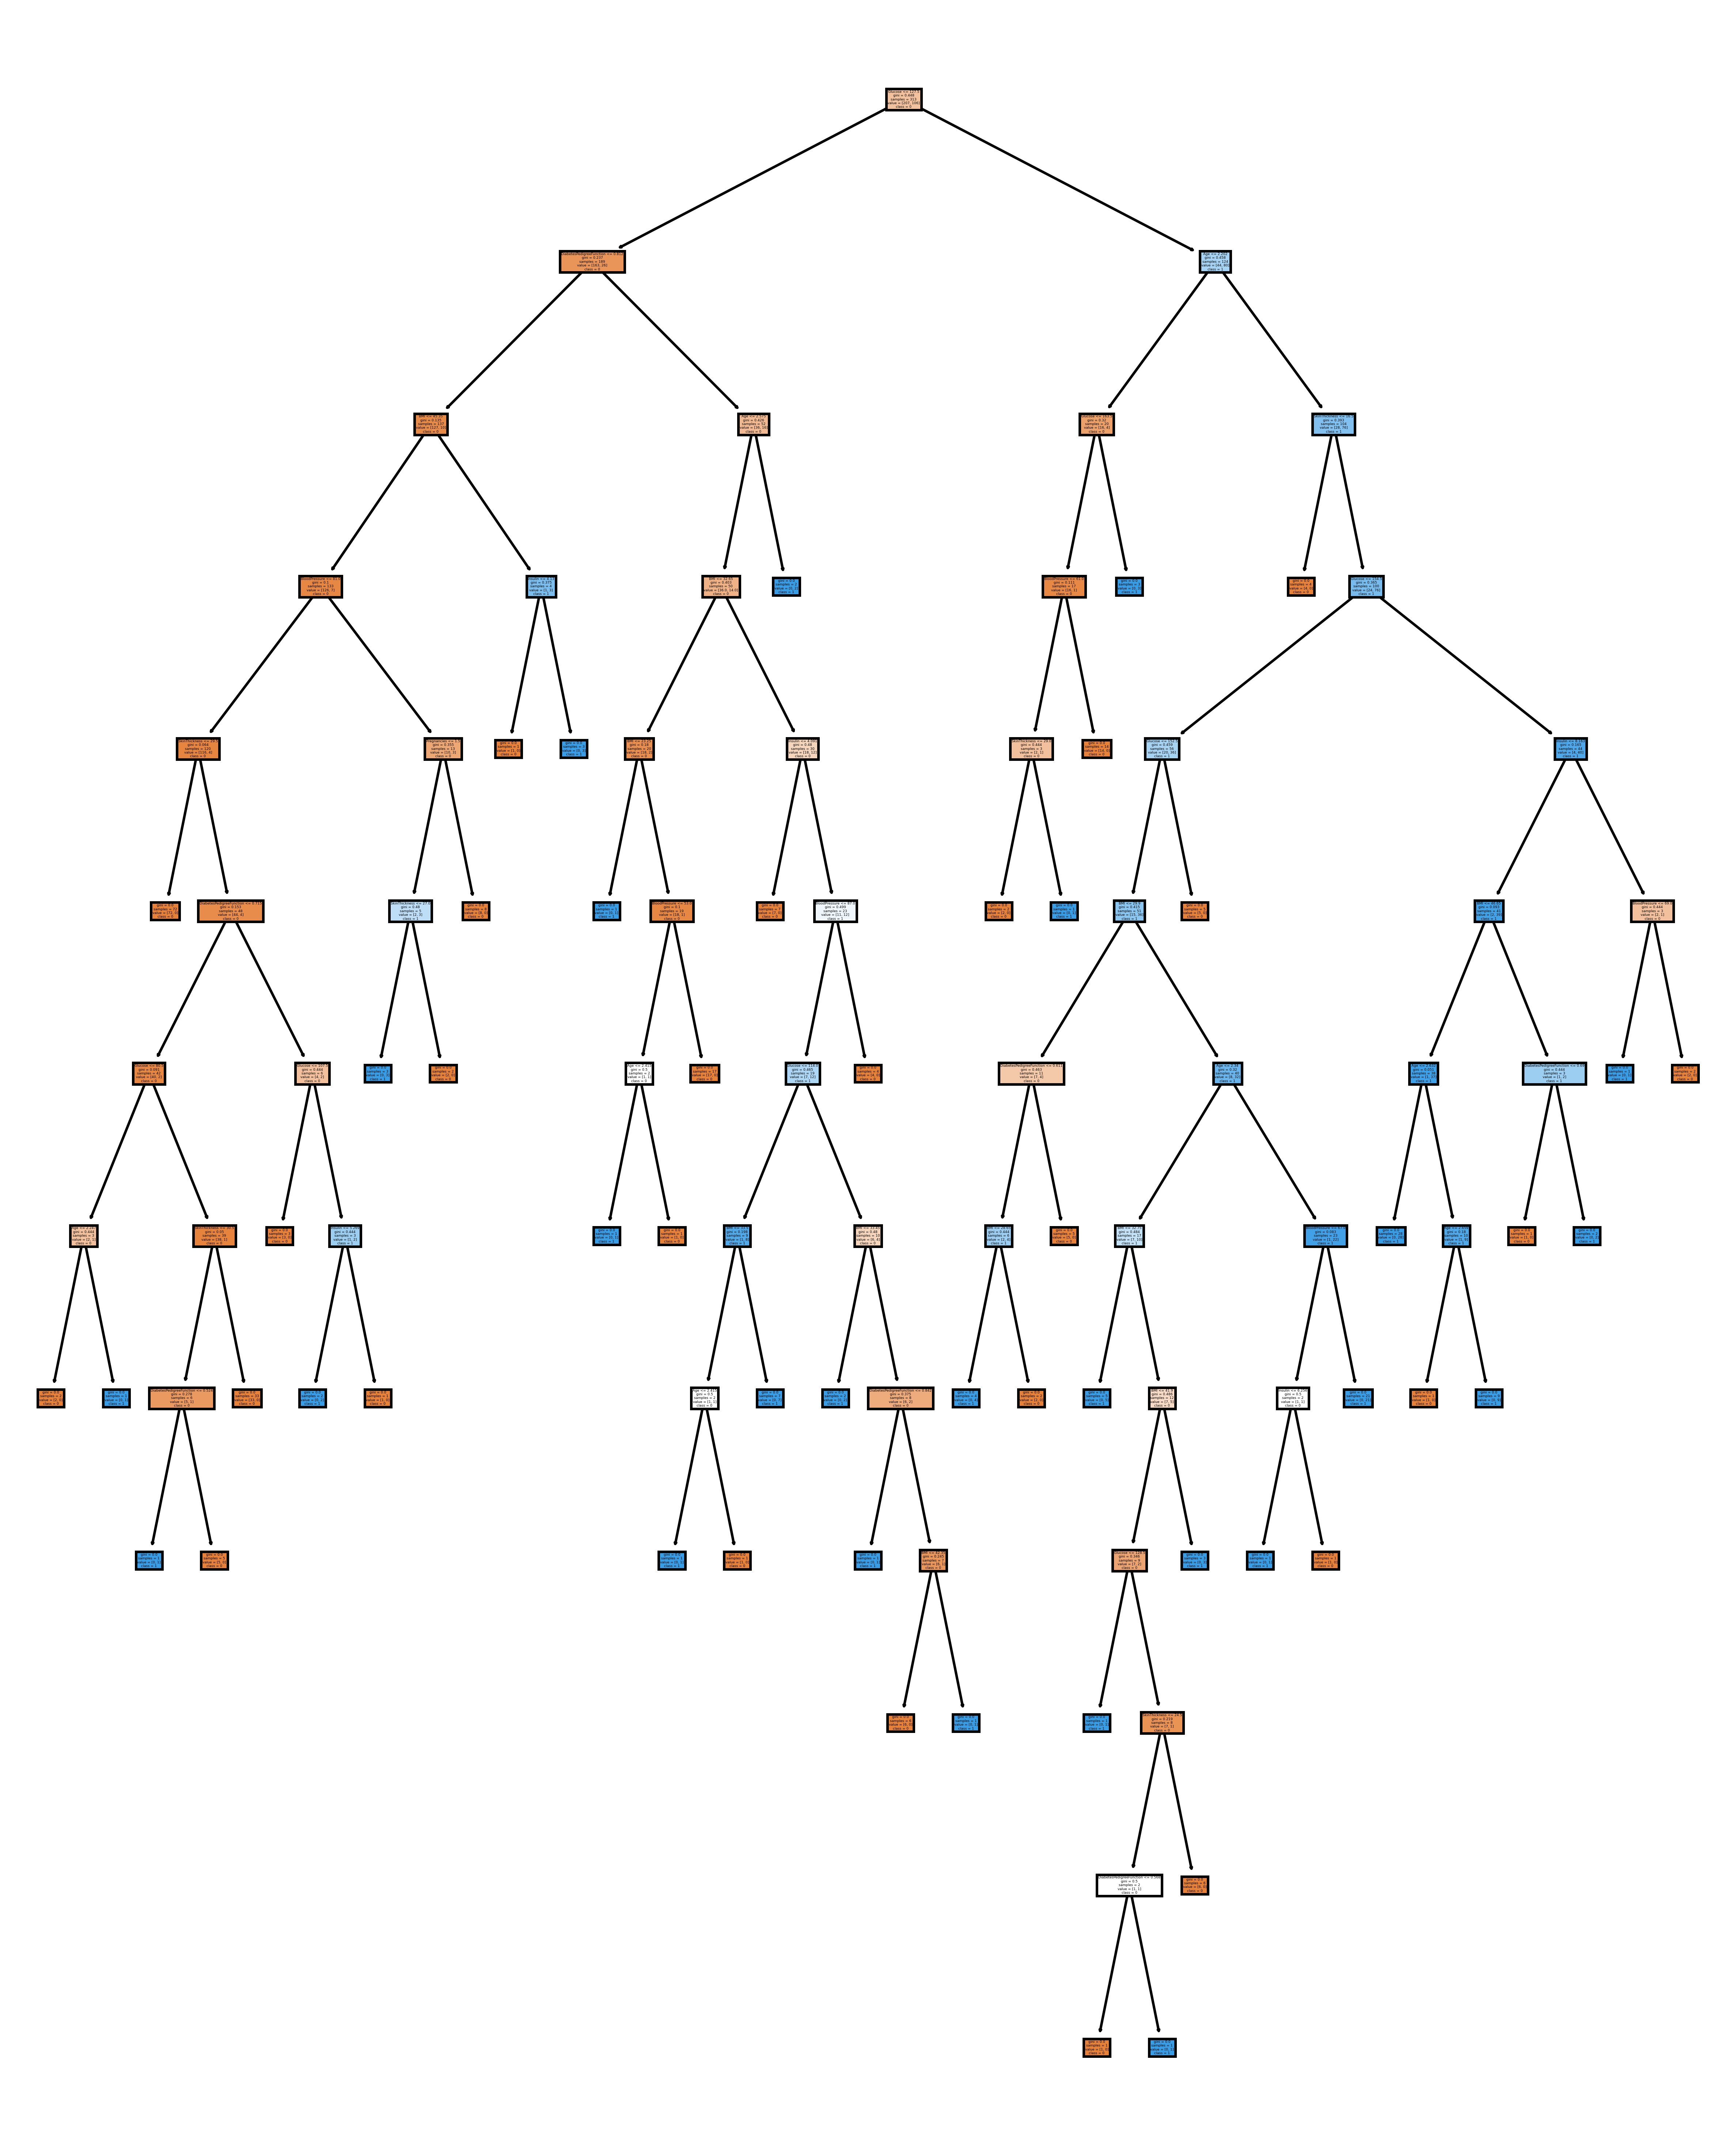

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,15),dpi = 500)
plot_tree(model,filled = True,feature_names=X_train.columns.tolist(),class_names =['0','1'])
plt.show()

**hyper parameter tuning using gridsearchcv**

In [43]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state= True)

param_grid ={'criterion':['gini','Entropy'],'max_depth':range(1,16)}

grid = GridSearchCV(estimator,param_grid,scoring ='accuracy',cv= 5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

**1st model with parameter**

In [44]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 3,random_state=True)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=True)

In [45]:
from sklearn.tree import plot_tree
plt.figure (figsize=(20,20),dpi=500)

plot_tree(model,filled=True,feature_names=X_train.columns.tolist(),
          class_names= ['0','1'])
plt.show()

**identify the unimportant features**

In [46]:
model.feature_importances_

array([0.        , 0.644083  , 0.        , 0.06639489, 0.        ,
       0.05644122, 0.06205369, 0.1710272 ])

In [47]:
pd.DataFrame(model.feature_importances_)

,0
0,0.000000
1,0.644083
2,0.000000
3,0.066395
4,0.000000
5,0.056441
6,0.062054
7,0.171027


In [48]:
pd.DataFrame(model.feature_importances_,columns = ['feature_importance'])

,feature_importance
0,0.000000
1,0.644083
2,0.000000
3,0.066395
4,0.000000
5,0.056441
6,0.062054
7,0.171027


In [49]:
f = pd.DataFrame(model.feature_importances_,columns = ['feature_importance'],index = X_train.columns.tolist())
f[f['feature_importance']>0]

,feature_importance
Glucose,0.644083
SkinThickness,0.066395
BMI,0.056441
DiabetesPedigreeFunction,0.062054
Age,0.171027


In [50]:
f = pd.DataFrame(model.feature_importances_,columns = ['feature_importance'],index = X_train.columns.tolist())
f[f['feature_importance']>0].index.tolist()

['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [51]:
s1 = pd.DataFrame(model.feature_importances_,
                  columns = ['feature_importance'],
                  index = X_train.columns.tolist())
imp =s1[s1['feature_importance']>0].index.tolist()
imp

['Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [52]:
X_train = X_train[imp]

In [53]:
X_train

,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age
334,117,23,33.8,0.682642,2.279507
258,180,26,36.5,0.560357,2.432299
139,78,29,36.9,0.658787,2.140695
310,181,42,40.0,1.121606,2.165737
349,101,17,24.2,0.783582,2.189939
...,...,...,...,...,...
203,96,34,24.7,0.971597,2.498999
255,154,32,29.3,0.915969,2.498999
72,156,28,34.3,1.090413,2.545730
235,134,33,25.9,0.678233,3.000000


In [54]:
X_test = X_test[imp]

In [55]:
X_test

,Glucose,SkinThickness,BMI,DiabetesPedigreeFunction,Age
81,111,12,28.4,0.703562,2.320596
165,105,32,30.8,0.349285,2.466326
351,95,39,44.6,0.604979,2.165737
119,165,33,52.3,0.653452,2.189939
379,120,37,42.3,0.886002,2.632148
...,...,...,...,...,...
23,176,34,33.7,0.683374,2.759669
293,92,32,32.0,0.291548,2.604291
13,145,19,22.2,0.494975,2.747696
90,109,39,27.9,0.800000,2.359611


In [56]:
X_train = X_train[imp]
X_test = X_test[imp]

**Decision Tree with important parameters and with important columns**

In [57]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',max_depth= 3,random_state=True)
model.fit(X_train,y_train) 

ypred_train = model.predict(X_train)
ybase_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(ypred_train,y_train))
print('test accuracy',accuracy_score(ybase_pred,y_test))
from sklearn.model_selection import cross_val_score
print('cross validation score',cross_val_score(model,X,y,cv=5).mean())

train accuracy 0.8498402555910544
test accuracy 0.7721518987341772
cross validation score 0.7604998377150276


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ybase_pred)

array([[44, 11],
       [ 7, 17]], dtype=int64)